In [15]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoode.nsder import NSDER
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival
from pymoo.factory import get_reference_directions

In [16]:
from pymoo.factory import get_problem
from pymoo.util.plotting import plot

problem = get_problem("dtlz2")

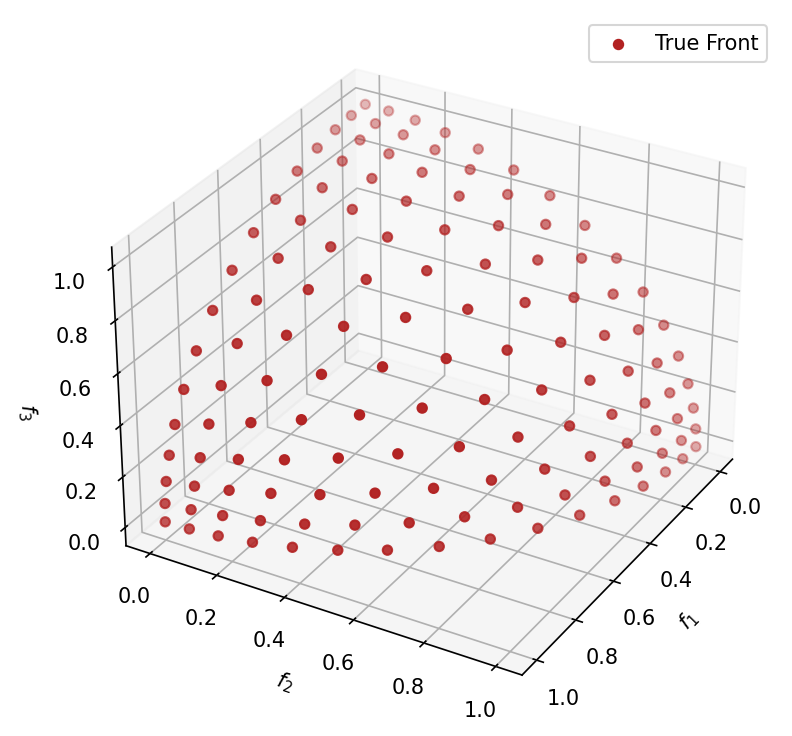

In [17]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})
ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [18]:
lhs = LatinHypercubeSampling()

In [19]:
NGEN = 250
POPSIZE = 136
SEED = 3

In [20]:
problem.__dict__

{'k': 8,
 'n_var': 10,
 'n_obj': 3,
 'n_constr': 0,
 'data': {'type_var': numpy.float64},
 'xl': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'xu': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x23861e45190>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x2385c2b71f0>,
 '_ideal_point': None,
 '_nadir_point': None}

In [21]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

In [22]:
ref_dirs.shape

(136, 3)

In [23]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.2, F=(0.1, 1.0), sampling=lhs, gamma=1e-4, refpoint=1,
            variant="DE/ranked/1/bin", SA=0.5,
            survival=RankSurvival(rule="full", crowding_func="mnn")
            )

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.501275985
    2 |     272 |  0.353759871 |  0.445290007
    3 |     408 |  0.322105095 |  0.431821219
    4 |     544 |  0.294715181 |  0.399044390
    5 |     680 |  0.266684298 |  0.351816652
    6 |     816 |  0.241756824 |  0.334692030
    7 |     952 |  0.217770829 |  0.278782095
    8 |    1088 |  0.190792236 |  0.238120694
    9 |    1224 |  0.173456413 |  0.221666530
   10 |    1360 |  0.160263726 |  0.205733531
   11 |    1496 |  0.140244623 |  0.185006941
   12 |    1632 |  0.130107098 |  0.162218263
   13 |    1768 |  0.122034347 |  0.143792346
   14 |    1904 |  0.110929136 |  0.128612001
   15 |    2040 |  0.102740001 |  0.119234595
   16 |    2176 |  0.093357027 |  0.095273222
   17 |    2312 |  0.087997228 |  0.090719004
   18 |    2448 |  0.082126561 |  0.081860932
   19 |    2584 |  0.078117567 |  0.077033649
   20 |    2720 |  0.073325657 |  0.073713238
   21 |    2856 |  0.066927937 |  

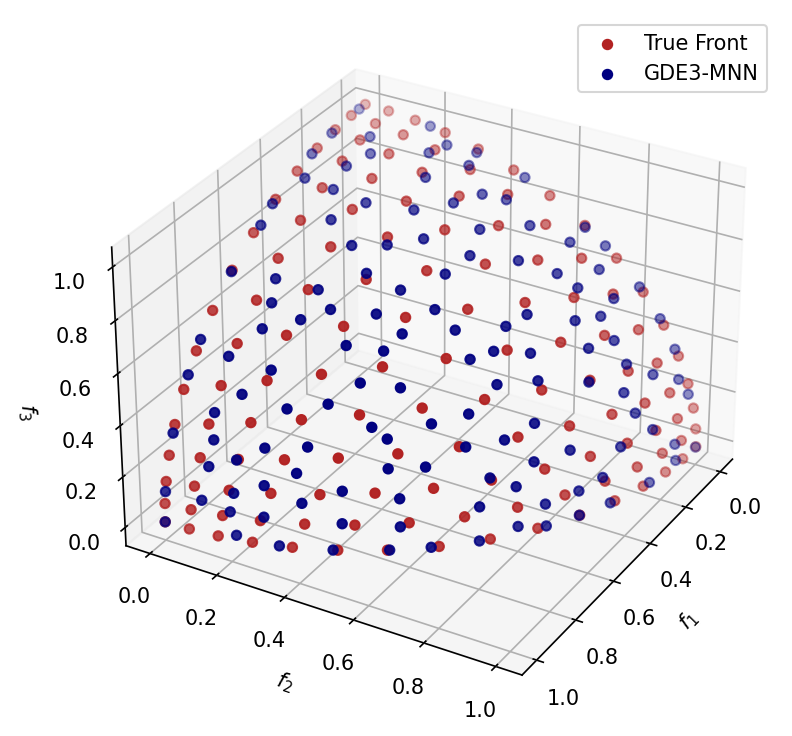

In [24]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [25]:
nsga3 = NSGA3(pop_size=POPSIZE, sampling=lhs,
              ref_dirs=ref_dirs)

res_nsga3 = moo_minimize(problem,
                         nsga3,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.379635563 |  0.471769797
    3 |     408 |  0.344446344 |  0.462725109
    4 |     544 |  0.311356774 |  0.379455101
    5 |     680 |  0.276861595 |  0.341810021
    6 |     816 |  0.242685082 |  0.288821435
    7 |     952 |  0.206166293 |  0.253956090
    8 |    1088 |  0.171647235 |  0.190395125
    9 |    1224 |  0.163088720 |  0.176998052
   10 |    1360 |  0.140361247 |  0.142812235
   11 |    1496 |  0.123655499 |  0.125153020
   12 |    1632 |  0.116637818 |  0.115771849
   13 |    1768 |  0.102922260 |  0.099178463
   14 |    1904 |  0.095706817 |  0.085479036
   15 |    2040 |  0.089658263 |  0.079800626
   16 |    2176 |  0.085228229 |  0.074333031
   17 |    2312 |  0.077633353 |  0.066933718
   18 |    2448 |  0.075609942 |  0.061667907
   19 |    2584 |  0.072389779 |  0.058579648
   20 |    2720 |  0.070784669 |  0.059067275
   21 |    2856 |  0.066376079 |  

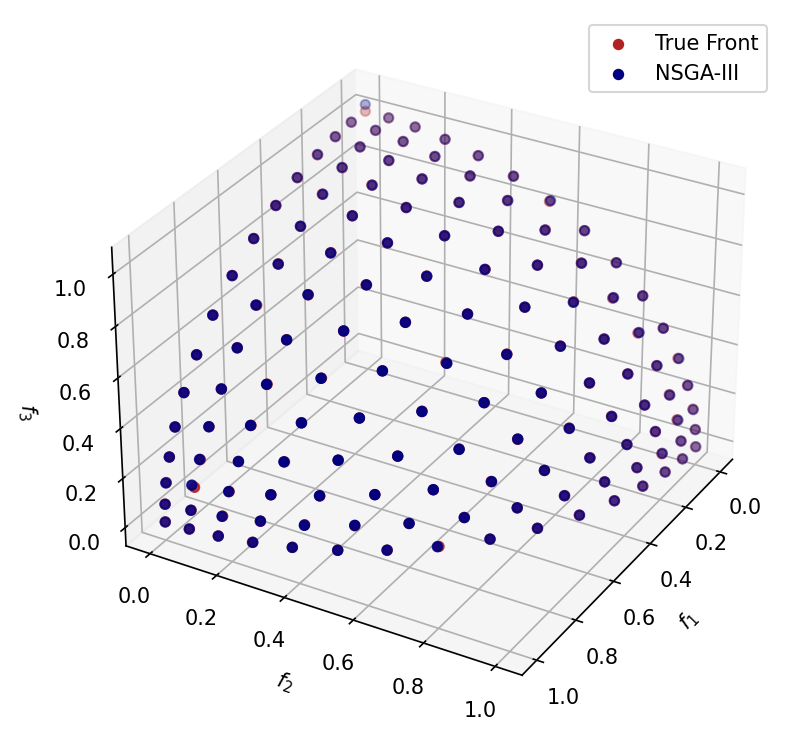

In [26]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSGA-III", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [27]:
nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE, CR=0.2, F=(0.1, 1.0), sampling=lhs, gamma=1e-4, refpoint=1.0,
             variant="DE/ranked/1/bin", SA=0.5)
    
res_nsder = moo_minimize(problem,
                         nsder,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |     igd      |      gd     
    1 |     136 |  0.409543711 |  0.488790248
    2 |     272 |  0.363981554 |  0.428189422
    3 |     408 |  0.320778140 |  0.407196310
    4 |     544 |  0.298204916 |  0.341155298
    5 |     680 |  0.254585629 |  0.301237328
    6 |     816 |  0.227610318 |  0.289186309
    7 |     952 |  0.214792404 |  0.253367877
    8 |    1088 |  0.183123277 |  0.198082835
    9 |    1224 |  0.166328857 |  0.166253144
   10 |    1360 |  0.151289112 |  0.150865770
   11 |    1496 |  0.137470732 |  0.124462783
   12 |    1632 |  0.125457739 |  0.115530328
   13 |    1768 |  0.114521546 |  0.109083025
   14 |    1904 |  0.105335991 |  0.097686472
   15 |    2040 |  0.095023244 |  0.089988415
   16 |    2176 |  0.089687984 |  0.083387264
   17 |    2312 |  0.084763320 |  0.077482482
   18 |    2448 |  0.081587850 |  0.073320706
   19 |    2584 |  0.078435421 |  0.070260076
   20 |    2720 |  0.075988250 |  0.067210953
   21 |    2856 |  0.071372922 |  

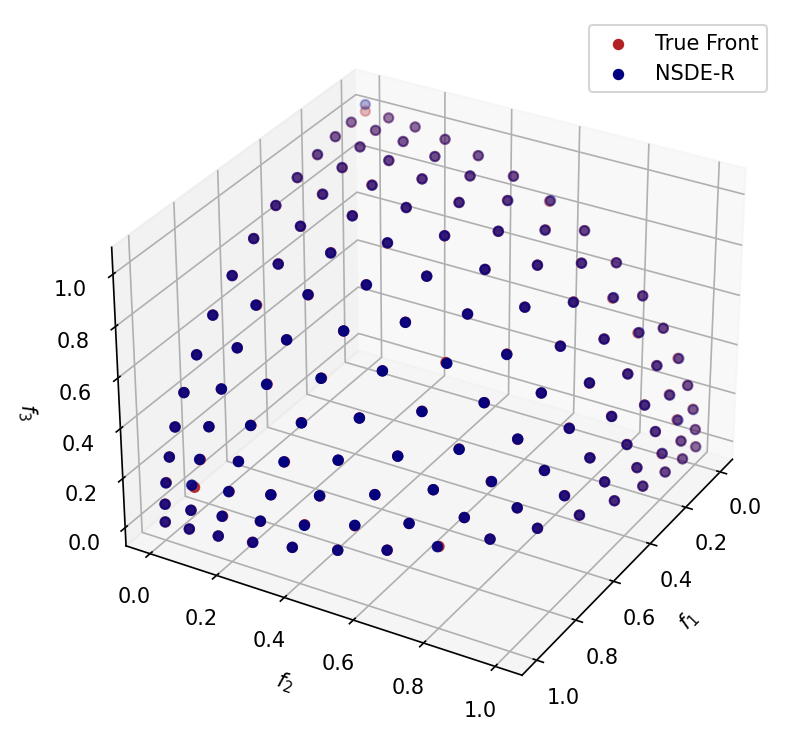

In [28]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsga3.F[:, 0], res_nsga3.F[:, 1], res_nsga3.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()